<a href="https://colab.research.google.com/github/shri4916/EDA_Project_Uber/blob/main/Uber_Go1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Title:
**Exploratory Data Analysis (EDA) on Uber NCR Rides Data**

Team Members:

1. Kunal Shelke

2. Shriniwas Ambad

3. Mahesh Bhalke

4. Chetan Wanjari

5. Rohit Gore


Tools & Technologies Used:
Python, Pandas, NumPy, Matplotlib, Plotly, Seaborn, Jupyter Notebook

Dataset: Uber NCR Rides data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Read a CSV file
df = pd.read_csv('/content/ncr_ride_bookings.csv')

# View first 5 rows
(df.head())

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [3]:
#Freqency of booking per hour
from datetime import datetime , time

total_bookings=len(df)

d1=datetime(2024,1,1,0,0,0)
d2=datetime(2024,12,31,0,0,0)
duration=d2-d1
total_min=duration.total_seconds()/60
total_min

total_hour=total_min/60
total_hour

# freqency of booking per hour
freq=round(total_bookings/total_hour,2)
print("freqency of booking per hour is ",freq)

freqency of booking per hour is  17.12


In [4]:
# Peak hours insights
df['Time']=pd.to_datetime(df['Time'])
df['Hour']=df['Time'].dt.hour
hour=df['Hour'].value_counts().reset_index()
hour.columns=['Hour','Customers']
print(hour.head())

peak_hour=hour.loc[hour['Customers'].idxmax()]
print(f"Peak Hour:{peak_hour}")

#Plot on graph
fig=px.bar(x='Hour',y='Customers',data_frame=hour, title= 'Ride per Hour')
fig.show()

/tmp/ipython-input-3157876127.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time']=pd.to_datetime(df['Time'])


   Hour  Customers
0    18      12397
1    19      11047
2    17      11044
3    16       9633
4    20       9630
Peak Hour:Hour            18
Customers    12397
Name: 0, dtype: int64


In [5]:
# avreage bookings per day
bookings=round(total_bookings/366,2)
print("avreage bookings per day are", bookings)



avreage bookings per day are 409.84


In [6]:
# Day wise customer count
df['Date']=pd.to_datetime(df['Date'])  # converting object into datetime
Day=df['Date'].dt.day_name()           # to convert date in to
Day.name='Day'                         # assigning "Day" as a series name
df['Day']=Day
Day.head()

df.insert(1,'Day',df.pop('Day'))

total_day=df['Day'].value_counts()
total_day

weekdays = pd.date_range('2024-01-01','2024-12-31',freq='D').day_name().value_counts()
weekdays.columns = ['Days', 'count']
weekdays

# Average booking per weekday
avg_per_day=total_day/weekdays
Avg_Booking=avg_per_day.reset_index()
Avg_Booking.columns=['DAY','Avg booking']
print(Avg_Booking)
Avg_Booking['DAY']=Avg_Booking['DAY'].astype(str)

fig=px.bar(x='DAY',y='Avg booking',data_frame=Avg_Booking, title='AVERAGE BOOKINGS PER WEEKDAYS')
fig.show()

         DAY  Avg booking
0     Friday   411.480769
1     Monday   408.377358
2   Saturday   414.269231
3     Sunday   411.500000
4   Thursday   407.980769
5    Tuesday   403.603774
6  Wednesday   411.788462


In [7]:
# monthly customers footfall

df['Date'] = pd.to_datetime(df['Date'])

monthly = df['Date'].dt.to_period("M").value_counts().sort_index().reset_index(name='customers')
monthly.columns=['Month','Customers']
print(monthly)
monthly['Month']=monthly['Month'].astype(str)

#Plot grapf
fig=px.bar(x='Month',y='Customers',data_frame=monthly, title="Monthly customers")
fig.show()



      Month  Customers
0   2024-01      12861
1   2024-02      11927
2   2024-03      12719
3   2024-04      12199
4   2024-05      12778
5   2024-06      12440
6   2024-07      12897
7   2024-08      12636
8   2024-09      12248
9   2024-10      12651
10  2024-11      12394
11  2024-12      12250


In [8]:
# Number of customers per vehicle type

Vehicle_Type = df["Vehicle Type"].value_counts()
Vehicle_Type = pd.DataFrame(Vehicle_Type).reset_index()
Vehicle_Type.columns = ["Vehicle Type","Number of customers"]
print(Vehicle_Type)
fig = px.bar(x='Vehicle Type',y='Number of customers',data_frame=Vehicle_Type )
fig.show()

    Vehicle Type  Number of customers
0           Auto                37419
1        Go Mini                29806
2       Go Sedan                27141
3           Bike                22517
4  Premier Sedan                18111
5          eBike                10557
6        Uber XL                 4449


    Vehicle Type  count  Incomplete Rides
0           Auto    1.0              2260
1           Bike    1.0              1328
2        Go Mini    1.0              1815
3       Go Sedan    1.0              1642
4  Premier Sedan    1.0              1063
5        Uber XL    1.0               262
6          eBike    1.0               630


/tmp/ipython-input-2996883213.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




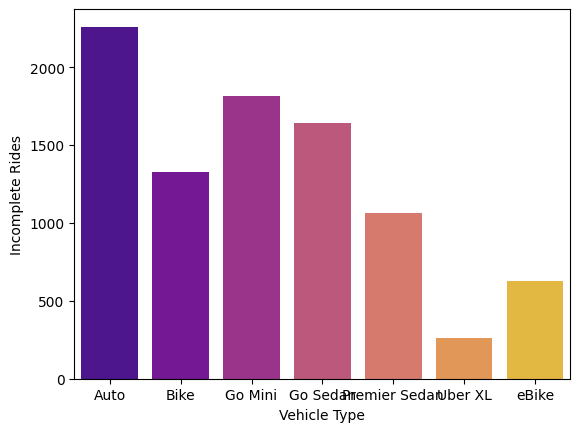

In [9]:
#Vehicle type vs incomplete rides
incomplete_ride=df.groupby('Vehicle Type')['Incomplete Rides'].value_counts().reset_index()
incomplete_ride.columns=['Vehicle Type','count','Incomplete Rides']
print(incomplete_ride)

fig=sns.barplot(x='Vehicle Type',y='Incomplete Rides',data=incomplete_ride,palette='plasma')



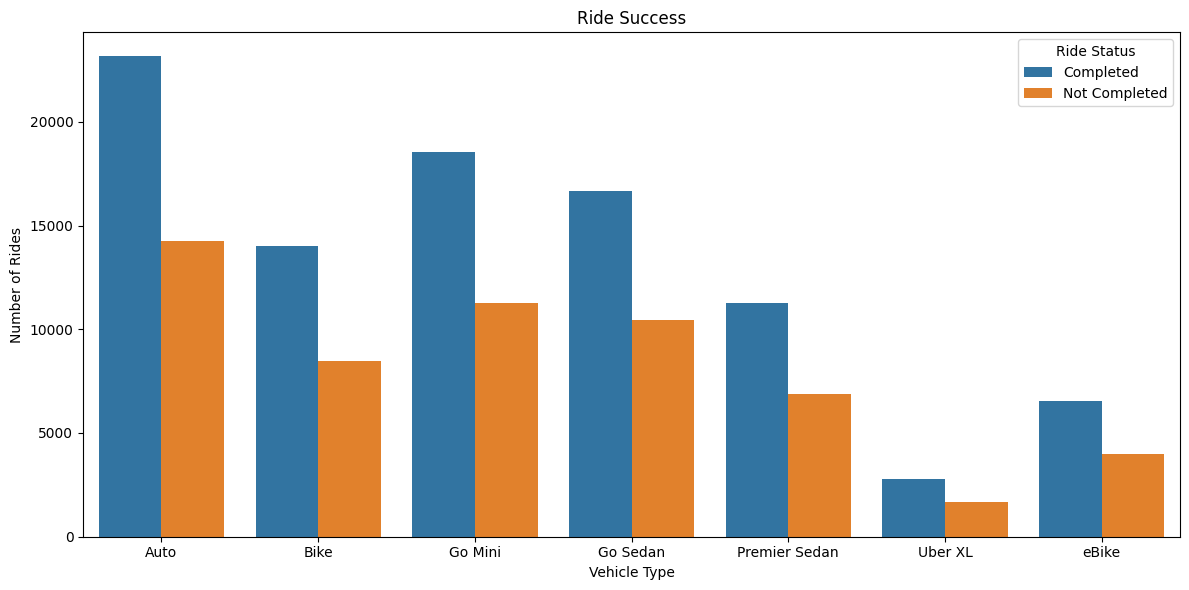

In [10]:
# Ride success

# Anything other thant completed is treated as not completed
# Not completed can be anything Ex Cancelled, incomplete, Driver not found
df['Ride Status'] = df['Booking Status'].apply(
    lambda x: 'Completed' if x == 'Completed' else 'Not Completed'
)

#Count rides by Vehicle Type and Status
count_df = (
    df.groupby(['Vehicle Type', 'Ride Status'])
      .size()
      .reset_index(name='Ride Count')
)

#Plot the graph (single chart)
plt.figure(figsize=(12, 6))

sns.barplot(
    data=count_df,
    x='Vehicle Type',
    y='Ride Count',
    hue='Ride Status'
)

plt.title('Ride Success')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Rides')
plt.legend(title='Ride Status')
plt.tight_layout()
plt.show()

In [11]:
#Payment Mode
pay=df['Payment Method'].value_counts()
pay=pd.DataFrame(pay).reset_index()
print(pay)
pay.columns=['Payment Method','no. of transactions']
fig=px.pie(pay,names='Payment Method',values='no. of transactions')
fig.show()

  Payment Method  count
0            UPI  45909
1           Cash  25367
2    Uber Wallet  12276
3    Credit Card  10209
4     Debit Card   8239


<Axes: xlabel='Vehicle Type', ylabel='Customer Rating'>

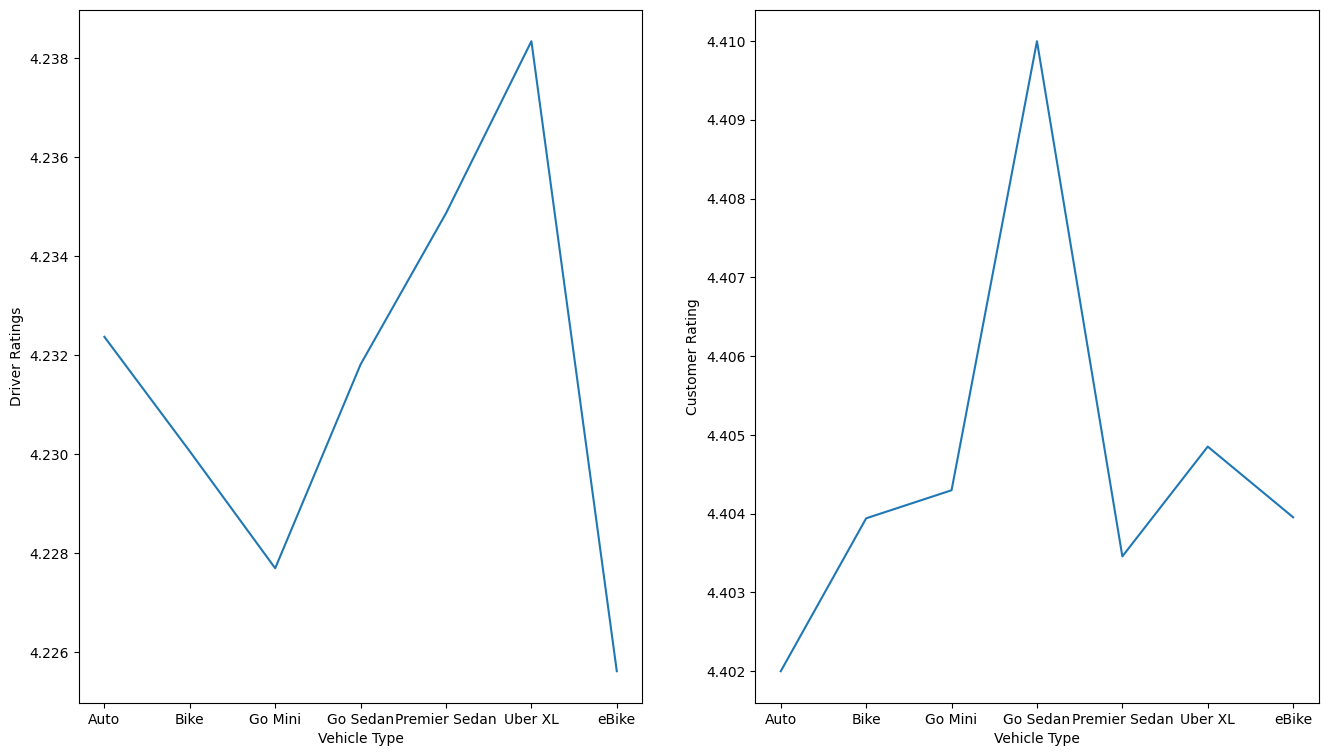

In [12]:
#Display cab rating in respect to cab type
Veh = df[['Vehicle Type', 'Customer Rating', 'Driver Ratings']]
plt.figure(figsize = (16, 9))

Veh = df.groupby('Vehicle Type', as_index= False).agg({'Customer Rating': 'mean','Driver Ratings':'mean'})
Veh.head()
#fig = px.bar(x = 'Vehicle Type', y= 'Customer Rating', data_frame = Veh)
#fig.show()

#fig = sns.barplot(x = 'Vehicle Type', y= 'Customer Rating', data = Veh)
plt.subplot(121)
sns.lineplot(x = "Vehicle Type", y = "Driver Ratings", data = Veh)

plt.subplot(122)
sns.lineplot(x = "Vehicle Type", y = "Customer Rating", data = Veh)

In [13]:
#Vehicle type vs ride distance
dist_veh = df.groupby('Vehicle Type')['Ride Distance'].sum()
distance=dist_veh.reset_index()
print(distance)

fig=px.bar(x='Vehicle Type',y='Ride Distance',data_frame=distance , title="Distance travelled per vehicle")
fig.show()


    Vehicle Type  Ride Distance
0           Auto      625615.53
1           Bike      378666.33
2        Go Mini      501200.60
3       Go Sedan      450793.61
4  Premier Sedan      302936.14
5        Uber XL       74306.81
6          eBike      179456.17


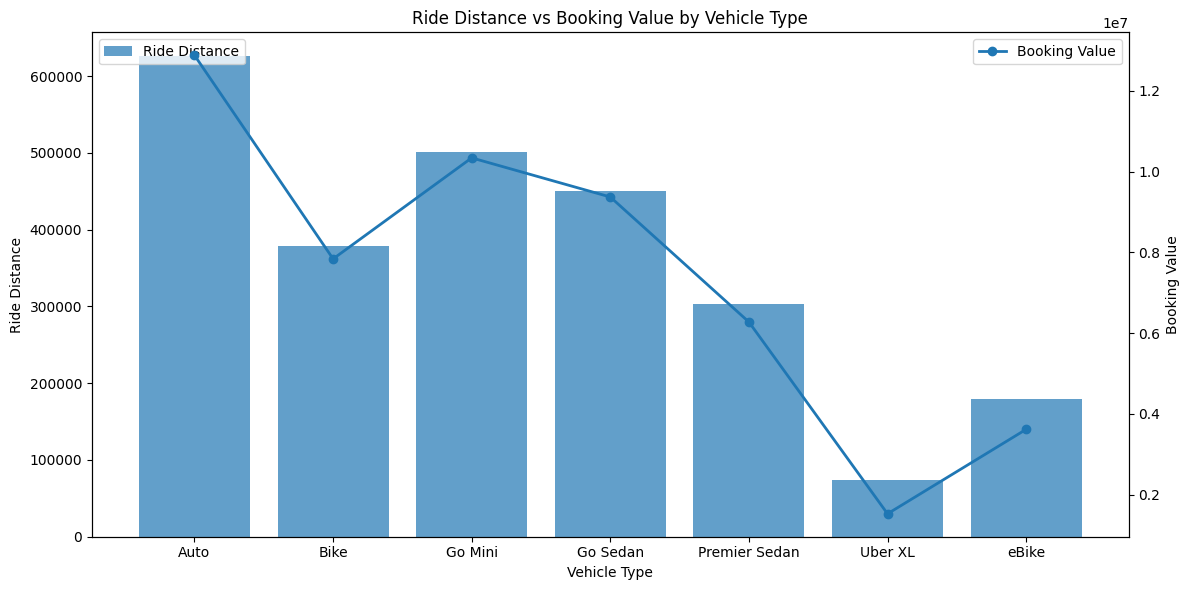

In [14]:
# KM vs Amount for vehicle type

dist_veh = (
    df.groupby("Vehicle Type", as_index=False)
      .agg({
          "Ride Distance": "sum",
          "Booking Value": "sum"
      })
)

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Ride Distance (left axis)
ax1.bar(
    dist_veh["Vehicle Type"],
    dist_veh["Ride Distance"],
    alpha=0.7,
    label="Ride Distance"
)
ax1.set_ylabel("Ride Distance")
ax1.set_xlabel("Vehicle Type")

# Booking Value (right axis)
ax2 = ax1.twinx()
ax2.plot(
    dist_veh["Vehicle Type"],
    dist_veh["Booking Value"],
    marker="o",
    linewidth=2,
    label="Booking Value"
)
ax2.set_ylabel("Booking Value")

# Title
plt.title("Ride Distance vs Booking Value by Vehicle Type")

# Legends
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()

In [15]:
# Filter and count cancelled rides by customers
cancelled_rides = df[df['Booking Status'] == 'Cancelled by Customer']
cancellation_counts = cancelled_rides['Reason for cancelling by Customer'].value_counts()
cancel_customer = pd.DataFrame(cancellation_counts).reset_index()
print(cancel_customer)
cancel_customer.columns = ['Reason for cancelling by Customer', 'Count']
fig = px.pie(cancel_customer, names='Reason for cancelling by Customer', values='Count')
fig.show()

              Reason for cancelling by Customer  count
0                                 Wrong Address   2362
1                               Change of plans   2353
2  Driver is not moving towards pickup location   2335
3                        Driver asked to cancel   2295
4                             AC is not working   1155


In [16]:
# Filter and count cancelled rides by Drivers

cancelled_rides = df[df['Booking Status'] == 'Cancelled by Driver']
cancellation_counts = cancelled_rides['Driver Cancellation Reason'].value_counts()
cancel_driver = pd.DataFrame(cancellation_counts).reset_index()
print(cancel_driver)
cancel_driver.columns = ['Driver Cancellation Reason', 'Count']
fig = px.pie(cancel_driver, names='Driver Cancellation Reason', values='Count')
fig.show()

            Driver Cancellation Reason  count
0               Customer related issue   6837
1       The customer was coughing/sick   6751
2        Personal & Car related issues   6726
3  More than permitted people in there   6686


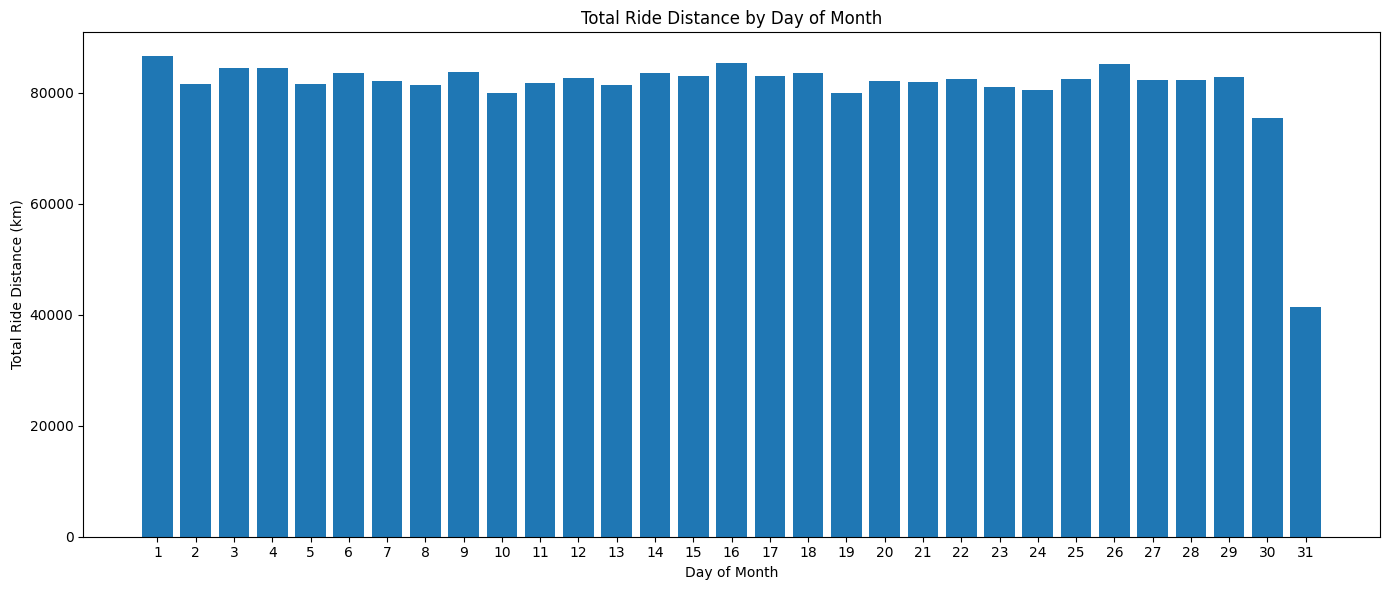

In [17]:
# Total Ride Distance per Day
df['Date'] = pd.to_datetime(df['Date'])

# Extract day name
df['Day'] = df['Date'].dt.day

day_month_distance = (
    df.groupby('Day')['Ride Distance']
      .sum()
      .reindex(range(1, 32), fill_value=0)
      .reset_index()
)

plt.figure(figsize=(14, 6))
plt.bar(
    day_month_distance['Day'],
    day_month_distance['Ride Distance']
)

plt.xlabel('Day of Month')
plt.ylabel('Total Ride Distance (km)')
plt.title('Total Ride Distance by Day of Month')
plt.xticks(range(1, 32))
plt.tight_layout()
plt.show()

<Axes: xlabel='Vehicle Type', ylabel='Avg CTAT'>

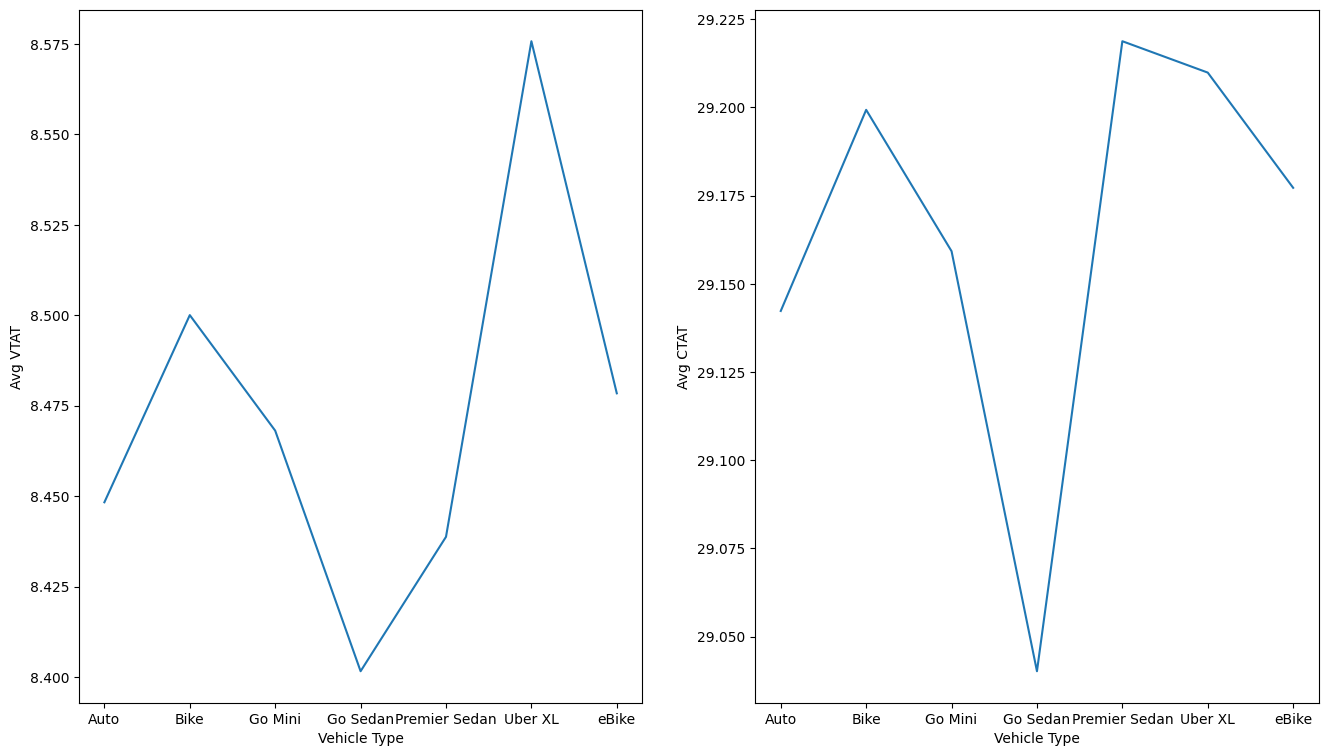

In [18]:
# Turnaround time
#Display VTAT and CTAT as per cab type
Veh = df[['Vehicle Type', 'Avg VTAT', 'Avg CTAT']]
plt.figure(figsize = (16, 9))

Veh = df.groupby('Vehicle Type', as_index= False).agg({'Avg VTAT': 'mean','Avg CTAT':'mean'})
Veh.head()

plt.subplot(121)
sns.lineplot(x = "Vehicle Type", y = "Avg VTAT", data = Veh)

plt.subplot(122)
sns.lineplot(x = "Vehicle Type", y = "Avg CTAT", data = Veh)

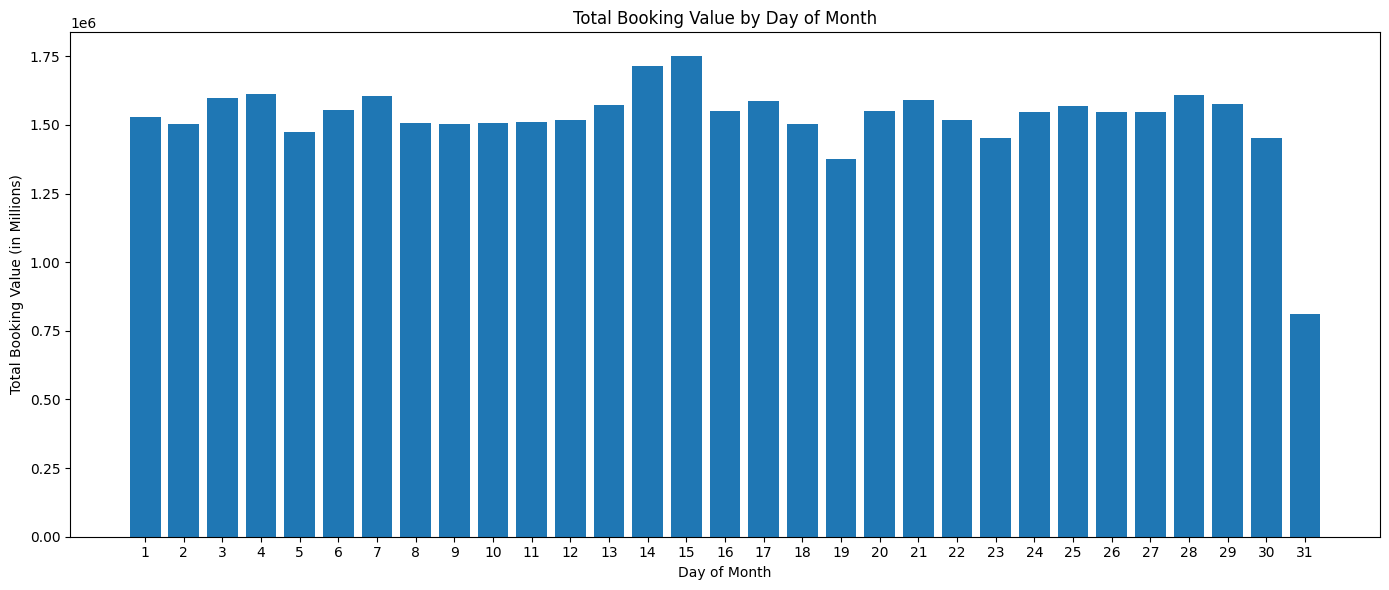

In [19]:
# Total Completed Booking values per Day of month

df['Date'] = pd.to_datetime(df['Date'])

# Extract day name
df['Day'] = df['Date'].dt.day

df_completed = df[df['Booking Status'] == 'Completed']
day_month_booking_value = (
    df_completed.groupby('Day')['Booking Value']
      .sum()
      .reindex(range(1, 32), fill_value=0)
      .reset_index()
)

plt.figure(figsize=(14, 6))
plt.bar(
    day_month_booking_value['Day'],
    day_month_booking_value['Booking Value']
)

plt.xlabel('Day of Month')
plt.ylabel('Total Booking Value (in Millions)')
plt.title('Total Booking Value by Day of Month')
plt.xticks(range(1, 32))
plt.tight_layout()
plt.show()

In [20]:
# Top 5 Customers (Customer ID) by Total Booking Value for completed rides

df_completed = df[df['Booking Status'] == 'Completed']

top_customers = (
    df_completed.groupby('Customer ID')['Booking Value']
    .sum()
    .reset_index()
    .sort_values('Booking Value', ascending=False)
    .head(5)
)

top_customers.columns=['Customer ID','Booking Value']
print(top_customers.reset_index(drop=True))

top_customers['Customer ID'] = top_customers['Customer ID'].astype(str)
fig=px.bar(x='Customer ID',y='Booking Value',data_frame=top_customers, title="Top 5 Customers by Total Booking Value")
fig.show()

    Customer ID  Booking Value
0  "CID2674107"         4987.0
1  "CID7828101"         4722.0
2  "CID2706299"         4277.0
3  "CID4843078"         4228.0
4  "CID2978596"         4220.0


In [21]:
# Top 10 most popular pick-up to drop location combinations

df['Route'] = df['Pickup Location'] + ' → ' + df['Drop Location']

# Count the frequency of each route
route_counts = df['Route'].value_counts().reset_index()
route_counts.columns = ['Route', 'Number of Rides']

# Get top 10 most popular routes
top_routes = route_counts.head(10)

print(top_routes)

fig=px.bar(x='Number of Rides',y='Route',data_frame=top_routes, title="Top 10 most popular routes")
fig.show()

                             Route  Number of Rides
0         DLF City Court → Bhiwadi               17
1            Akshardham → RK Puram               16
2  Janakpuri → Faridabad Sector 15               16
3           Jor Bagh → Rohini East               15
4           Vatika Chowk → Rithala               15
5           Ghaziabad → Badshahpur               15
6    Rithala → Udyog Vihar Phase 4               15
7      Connaught Place → Paharganj               14
8         Rohini West → Sohna Road               14
9    South Extension → Gwal Pahari               14


In [23]:
# ride incomplete by vehicle type
idf=df[df['Incomplete Rides'].notna()].copy()
idf_veh=idf['Vehicle Type'].value_counts().reset_index()
idf_veh.columns=['Vehicle_Type','Ride incomplete']
print(idf_veh)
fig=px.pie(data_frame=idf_veh ,names='Vehicle_Type', values='Ride incomplete')
fig.show()

    Vehicle_Type  Ride incomplete
0           Auto             2260
1        Go Mini             1815
2       Go Sedan             1642
3           Bike             1328
4  Premier Sedan             1063
5          eBike              630
6        Uber XL              262


In [29]:
# Revenue Per Month of Successfull rides

ndf = df[df['Incomplete Rides'].isna()].copy()  # created new DataFrame with only successfull rides



ndf['Date']=pd.to_datetime(ndf['Date'])
ndf['Month'] = ndf['Date'].dt.to_period("M")
Month = ndf['Month']
Monthly=ndf.groupby('Month')['Booking Value'].sum().reset_index()
Monthly.columns=['Months','Total_Amount']
Monthly['Months']=Monthly['Months'].astype(str)
print(Monthly)

fig=px.bar(x='Months',y='Total_Amount', data_frame=Monthly)
fig.show()

     Months  Total_Amount
0   2024-01     4001547.0
1   2024-02     3756610.0
2   2024-03     4174900.0
3   2024-04     3885255.0
4   2024-05     3935207.0
5   2024-06     3964298.0
6   2024-07     3961939.0
7   2024-08     3867753.0
8   2024-09     3820536.0
9   2024-10     4008403.0
10  2024-11     3938458.0
11  2024-12     3945668.0


In [24]:
# ratio of incomplete ride to complete (pie

aa={'complete_rides': 141000 , 'incomplete_rides': 9000}
Ratio=pd.Series(aa)
Ratio=Ratio.reset_index()
Ratio.columns=['Ride_Detail','Rides']
print(Ratio)

fig=px.pie(names ='Ride_Detail', values='Rides', data_frame=Ratio)
fig.show()

        Ride_Detail   Rides
0    complete_rides  141000
1  incomplete_rides    9000


In [25]:
# average ride distance per ride of successfull ride

ndf = df[df['Incomplete Rides'].isna()].copy()  # created new DataFrame with only successfull rides

num_rides=len(ndf)

total_distance=ndf['Ride Distance'].sum()

# use round(2) for 2 digit after decimal
average_distance=round(total_distance/num_rides,2)

print('average distance per ride', average_distance)

average distance per ride 17.15


In [26]:
# average ride distance per ride
num_rides=len(df)

total_distance=df['Ride Distance'].sum()

# use round(2) for 2 digit after decimal
average_distance=round(total_distance/num_rides,2)

print('average distance per ride', average_distance)

average distance per ride 16.75


In [27]:
# Average Turnaround Time OF Successfull ride
VTAT=round(ndf['Avg VTAT'].mean(),2)
print('Average Vehicle Turnaround Time per ride is',VTAT,'minutes')
CTAT=round(ndf['Avg CTAT'].mean(),2)
print('Average Customers Turnaround Time per ride is',CTAT,'minutes')

Average Vehicle Turnaround Time per ride is 8.62 minutes
Average Customers Turnaround Time per ride is 30.03 minutes


In [28]:
# total customers in year

date = df['Date'].value_counts().sort_index()
date=pd.DataFrame(date).reset_index()
customres=date['count'].sum()
print('Total footfall are',customres)

#Average monthly customres
avg_monthly_customres=int(customres/12)
print('Average monthly customres footfall are',avg_monthly_customres)

#avg_weekly_footfall
avg_weekly_customres=int(customres/52)
print('Average weekly customres footfall are',avg_weekly_customres)

#Average daily customres
avg_daily_customres=int(customres/365)
print('Average daily customres footfall are',avg_daily_customres)

Total footfall are 150000
Average monthly customres footfall are 12500
Average weekly customres footfall are 2884
Average daily customres footfall are 410
